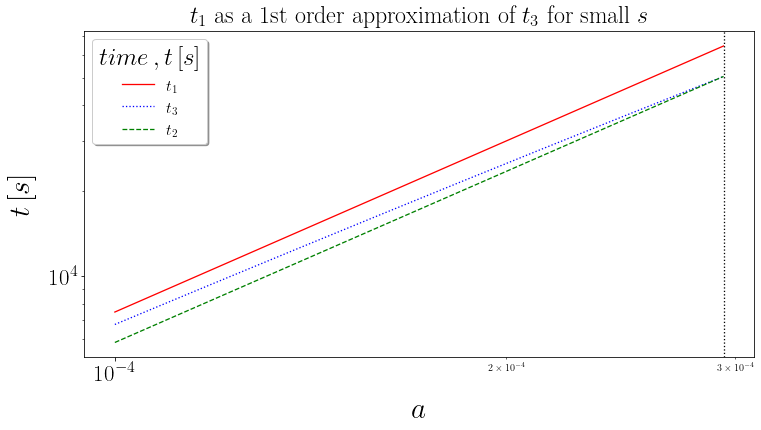

In [1]:
# Accretion of matter and radiation around the PBH from RD to MRE such that
# dm/dz = dm/dt . dt/dz

from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
from accretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


# Here, s = a/a_eq
# Here, v = c_s with c_s speed of sound in the surrounding medium.
# Here, γ is the ratio between the PBH mass and the horizon mass.



def t_1(a): #time in presence of radiation and matter as approximation of t_3
            #for small values of s (or a) up to 1st order in s. 
    C =  np.sqrt(3/(4 * np.pi * G * ρ_eq))
    s = a/a_eq
    return   C *  ((s**2)/2) 


def t_2(a): #time in presence of radiation domination
    return  t_eq * ((a/a_eq)**2)


def t_3(a): # time in presence of radiation and matter
    C =  np.sqrt(3/(4 * np.pi * G * ρ_eq))
    s = a/a_eq
    return C * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3))




a = np.geomspace(1e-4, a_eq, 1000000)


fig, ax = plt.subplots(1, figsize = (12, 6))
plt.rc('lines', linewidth = 1.3)
plt.loglog(a, t_1(a), 'r')
plt.loglog(a, t_3(a), 'b:')
plt.loglog(a, t_2(a), 'g--')
plt.axvline(x = a_eq,  color = 'k',  linestyle = ':')

plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.ylabel('$t\,[s]$',fontsize = 29.5, labelpad = 12)
plt.xlabel('$a$',fontsize = 29.5, labelpad = 12)

plt.legend(['$t_{1}$', '$t_{3}$',
            '$t_{2}$'], 
           prop = {'size':16}, loc = 'upper left', shadow = True, 
           title = '$time\,, t\, [s]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.title('$t_{1}$ as a 1st order approximation of $t_{3}$ for small $s$', fontsize = 24, pad = 8)
plt.savefig('tvsa1.pdf', bbox_inches = 'tight')
plt.show()

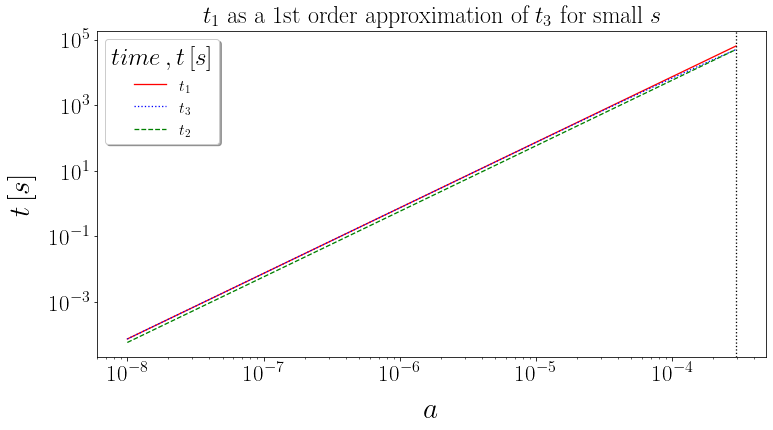

In [2]:
a = np.geomspace(1e-8, a_eq, 1000000)


fig, ax = plt.subplots(1, figsize = (12, 6))
plt.rc('lines', linewidth = 1.3)
plt.loglog(a, t_1(a), 'r')
plt.loglog(a, t_3(a), 'b:')
plt.loglog(a, t_2(a), 'g--')
plt.axvline(x = a_eq,  color = 'k',  linestyle = ':')

plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.ylabel('$t\,[s]$',fontsize = 29.5, labelpad = 12)
plt.xlabel('$a$',fontsize = 29.5, labelpad = 12)

plt.legend(['$t_{1}$', '$t_{3}$',
            '$t_{2}$'], 
           prop = {'size':16}, loc = 'upper left', shadow = True, 
           title = '$time\,, t\,[s]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.title('$t_{1}$ as a 1st order approximation of $t_{3}$ for small $s$', fontsize = 24, pad = 8)
plt.savefig('tvsa2.pdf', bbox_inches = 'tight')
plt.show()

In [3]:
# Since t_1 is a Taylor expansion of t_3 around s = 0 in the limit of s<<1, 
# so it becomes clear that t_1 and t_3 don't coincide at s = a/a_eq but they do
# agree for small values of s hence a. 


#We know that the ‘true’ behaviour is the blue dotted line, and that at small a , 
# you should have t ~ a^2, but the difference is in the choice of where to match. 
# It’s conceptually easy to ‘match’ at a = a_eq (the green dashed line), 
# but the value is more correct at small a if you ‘match’ in the limit a -> 0 
# (the red line).

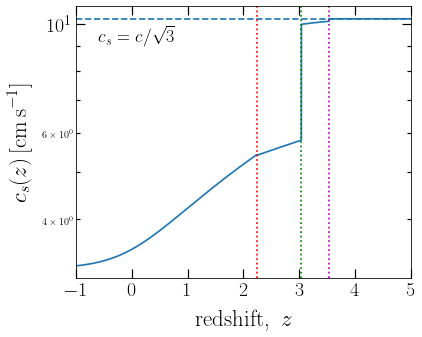

In [4]:
# Speed of sound as a function of redshift as per Fig.(B.5)  of
# Jared R. Rice et al. https://arxiv.org/abs/1702.08069v2

colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6, 5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_arr = np.geomspace(0.1, 1e5, 100000)
c_s_arr = np.zeros(len(z_arr))
for i, z in enumerate(z_arr):
    c_s_arr[i] = c_s(z) * (pc/yr) * 100
    
ax.plot(np.log10(z_arr), np.log10(c_s_arr), 'C0')


plt.text(-0.6, 9.2, '$c_{s} = c/\sqrt{3}$', fontsize = 18, color = 'k')
    

plt.axhline(y = np.log10(c/np.sqrt(3)* (pc/yr) * 100),  color = 'C0',  linestyle = '--')
plt.axvline(x = np.log10(z_th),  color = 'r',  linestyle = ':')
plt.axvline(x = np.log10(z_rec),  color = 'g',  linestyle = ':')
plt.axvline(x = np.log10(z_eq),  color = 'm',  linestyle = ':')


plt.xlim(-1, 5)
plt.yscale('log')
plt.xlabel('redshift, $\, z$',  fontsize = 23, labelpad = 10)
plt.ylabel(' $c_{s}(z)\, \mathrm{[cm \,s^{-1}}]$', fontsize = 23, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('c_s_z.pdf', bbox_inches = 'tight')
plt.show()

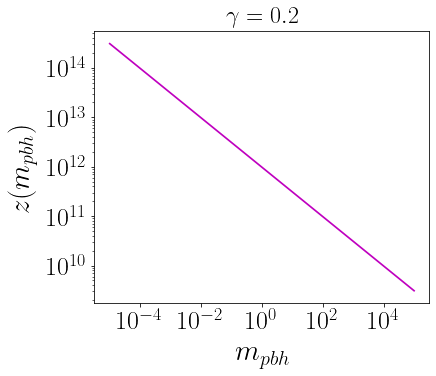

In [5]:
#Redshift at which formation of PBH takes place as matter domination (Eq. 20) in https://arxiv.org/pdf/1706.10288.pdf  
# Here, γ is the ratio between the PBH mass and the horizon mass.
# t = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((s**2)/2)  with s = a/a_eq.

m_arr = np.geomspace(1e5, 1e-5, 6)


plt.figure(figsize = (6, 5))
plt.loglog(m_arr , z_pbh(m_arr, γ = 0.2), 'm')
plt.xlabel('$m_{pbh}$', fontsize = 29, labelpad = 10) 
plt.ylabel('$z(m_{pbh})$', fontsize = 29, labelpad = 10)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.title('$\gamma = 0.2$', fontsize = 24, pad = 8)
plt.show()

In [6]:
# Accretion of matter and radiation from redshift of PBH foramtion i.e. z_i to
# MRE such that dm/dz = dm/dt . dt/dz with full dt/dz calculated from t_3 with
# t_3 = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)).
# Here, z_i is the redshift at which PBH formation takes place in RD.




# Accretion of radiation as per ρ = ρ_r0 (1 + z)⁴ up to z_eq.
# Using dt/dz as per t_3 = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)) 
def m_racc(t, m):
    z = t
    y = np.array(m, dtype=np.longdouble)
    β = ((4 * π * (G**2) * η_acc)) * np.sqrt(3/(8 * π * G * ρ_c0))
    
    x = (Ω_r0 * ((1 + z)**2)) + (Ω_m0 * (1 + z))
    if x < 0 or x == 0:
        print("i =",   i, ",", "z =", z, ",", "x =", x)
    
    dm = - (β * (y**2) * ρ_r0  * ((1 + z)**2))/((c_s(z)**(3)) * (x**(1/2)))
    return  dm
    


    
### Accretion of baryons with ρ = ρ_b0 (1 + z)³ up to z_eq.
# Using dt/dz as per t_3 = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)) 
def m_bacc(t, m):
    z = t
    y = np.array(m, dtype=np.longdouble)
    β = (4 * π * (G**2) * η_acc) * np.sqrt(3/(8 * π * G * ρ_c0))
    
    x = (Ω_r0 * ((1 + z)**2)) + (Ω_m0 * (1 + z))
    if x < 0 or x == 0:
        print("i =",   i, ",", "z =", z, ",", "x =", x)
    
    dm = - (β * ((y**2) * ρ_m0  * (1 + z))/ ((c_s(z)**3) * (x**(1/2))))
    return  dm

In [7]:
# Radiation accretion around the isolated PBHs.

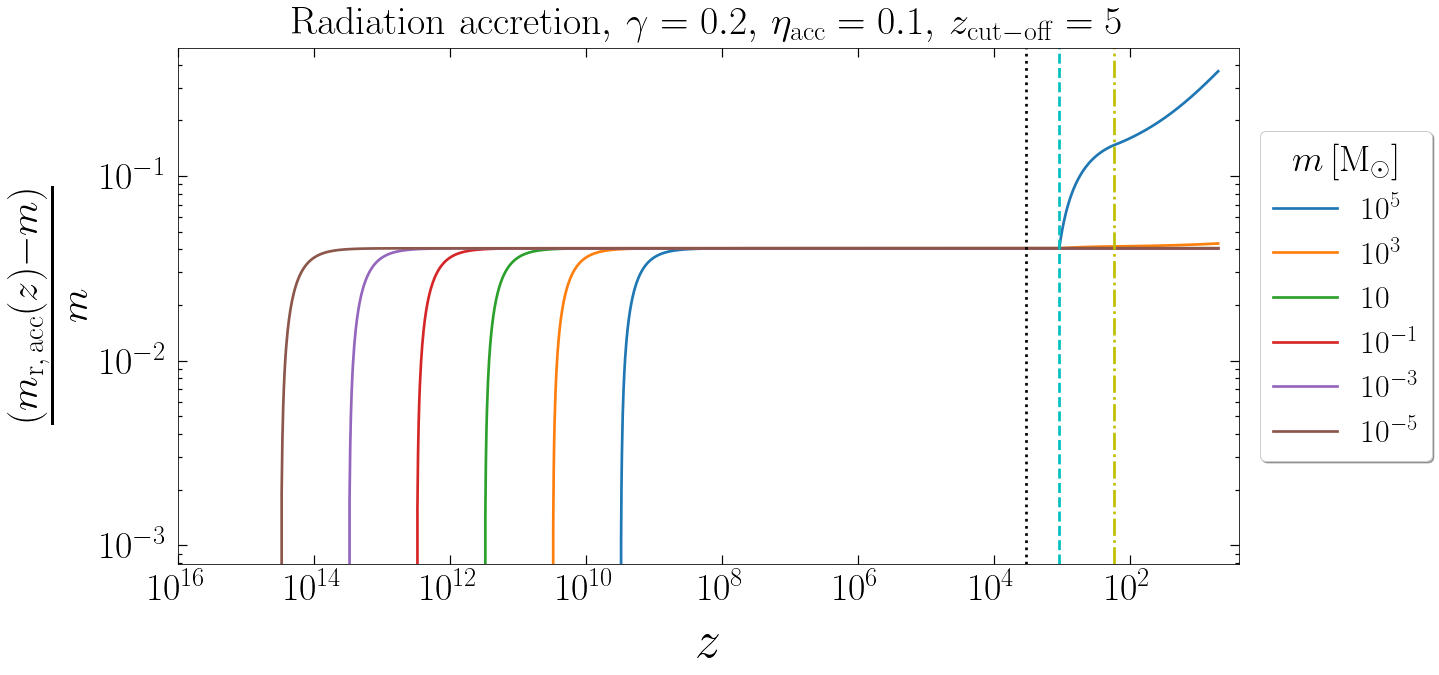

In [8]:
# Radiation accretion starting from z_i upto z_cut-off = 5.


m_arr = np.geomspace(1e5, 1e-5, 6)


colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 2.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



γ = 0.2
z_cut = 5
N = 1000

for i, (m, color) in enumerate(zip(m_arr, colors)):
    z_1i = z_pbh(m,  γ)
    y_1i = m 
    z_cut_off1 = z_eq
    t1 = np.geomspace(z_1i, z_cut_off1, N)
    sol1 = solve_ivp(m_racc, t_span = [t1[0], t1[-1]], y0 = [y_1i], method = 'DOP853',  t_eval = t1)
    t1 = sol1.t
    y1 = sol1.y[0]
    
    
    z_2i = z_cut_off1
    y_2i = y1[-1]
    z_cut_off2 = z_rec
    t2 = np.geomspace(z_2i, z_cut_off2, N)
    sol2 = solve_ivp(m_racc, t_span = [t2[0], t2[-1]], y0 = [y_2i], method = 'DOP853',   t_eval = t2, max_step = 100)
    t2 = sol2.t
    y2 = sol2.y[0]
    
    
    
    z_3i = z_cut_off2
    y_3i = y2[-1]
    z_cut_off3 = z_th
    t3 = np.geomspace(z_3i, z_cut_off3, N)
    sol3 = solve_ivp(m_racc, t_span = [t3[0], t3[-1]], y0 = [y_3i], method = 'DOP853',  t_eval = t3, max_step = 10)
    t3 = sol3.t
    y3 = sol3.y[0]
    
    
    
    z_4i = z_cut_off3
    y_4i = y3[-1]
    z_cut_off4 = 90
    t4 = np.geomspace(z_4i, z_cut_off4, N)
    sol4 = solve_ivp(m_racc, t_span = [t4[0], t4[-1]], y0 = [y_4i], method = 'DOP853',  t_eval = t4, first_step = 1,  max_step = 10)
    t4 = sol4.t
    y4 = sol4.y[0]
    
    
    z_5i = z_cut_off4
    y_5i = y4[-1]
    z_cut_off5 = z_cut
    t5 = np.geomspace(z_5i, z_cut_off5, N)
    sol5 = solve_ivp(m_racc, t_span = [t5[0], t5[-1]], y0 = [y_5i], method = 'DOP853',  t_eval = t5, first_step = 1, max_step = 5)
    t5 = sol5.t
    y5 = sol5.y[0]
    
    
    
    T = np.concatenate((t1, t2, t3, t4, t5), axis = None)
    Y = np.concatenate((y1, y2, y3, y4, y5), axis = None)
    
    #print("i =", i, "," , "z = ", T)
    ax.loglog(T, ((Y - m)/m))

        
    
    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.axvline(x = z_rec,  color = 'c',  linestyle = '--')
plt.axvline(x = z_th,  color = 'y',  linestyle = '-.')

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)


plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$z$',fontsize = 52, labelpad = 14)
plt.ylabel(r'$\frac{(m_\mathrm{r, \, acc}(z) - m)}{m} $',fontsize = 58, labelpad = 14)
plt.legend(['$10^{5}$', r'$10^{3}$', '$10$', 
            '$10^{-1}$', '$10^{-3}$', r'$10^{-5}$'], 
           prop = {'size':32}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
plt.xlim(1e16, 0.5*z_cut)
plt.xscale('log')
plt.title(r'Radiation accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1,\, z_\mathrm{cut-off} =  5$', fontsize = 40, pad = 13)
plt.savefig('racc_z_cutoff5.pdf', bbox_inches = 'tight')
plt.show()

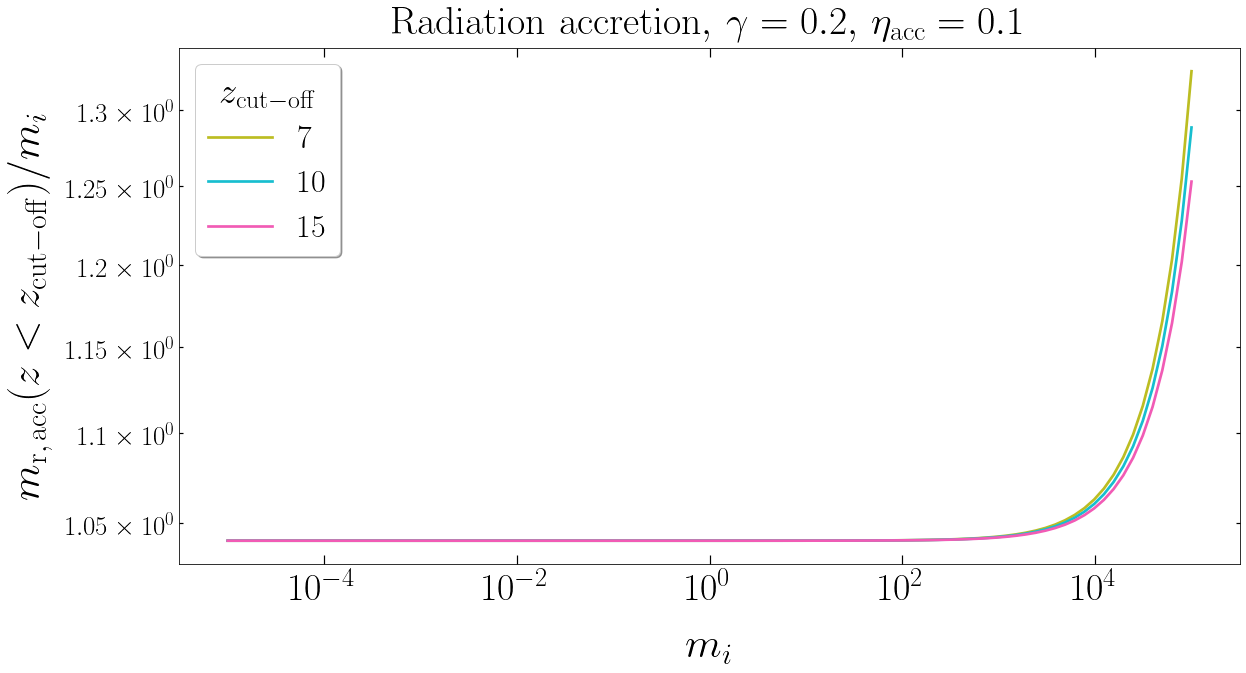

In [9]:
# Radiation accretion from redshift of PBH formation i.e. z_i to 
# different values of z_cut-off.
# Here, m_f(z < z_cut-off)/m_i implies  m_f(z = z_cut-off)/m_i.

m_spacing = 100
mi_arr = np.geomspace(1e5, 1e-5, m_spacing)




fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 2.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_cut_arr = np.array([7, 10, 15])
mf_arr = np.zeros(len(mi_arr))
colors = ['C8',  'C9', '#f15bb5' ]
plot_lines = []

γ = 0.2
N = 10
for i, (z_cut, color) in enumerate(zip(z_cut_arr, colors)):
    for j, m in enumerate(mi_arr):
        z_1i = z_pbh(m,  γ)
        y_1i = m
        z_cut_off1 = z_eq
        t1 = np.geomspace(z_1i, z_cut_off1, N)
        sol1 = solve_ivp(m_racc, t_span = [t1[0], t1[-1]], y0 = [y_1i], method = 'DOP853',  t_eval = t1)
        t1 = sol1.t
        y1 = sol1.y[0]


        z_2i = z_eq
        y_2i = y1[-1]
        z_cut_off2 = z_rec
        t2 = np.geomspace(z_2i, z_cut_off2, N)
        sol2 = solve_ivp(m_racc, t_span = [t2[0], t2[-1]], y0 = [y_2i], method = 'DOP853', t_eval = t2, max_step = 100)
        t2 = sol2.t
        y2 = sol2.y[0]



        z_3i = z_rec
        y_3i = y2[-1]
        z_cut_off3 = z_th
        t3 = np.geomspace(z_3i, z_cut_off3, N)
        sol3 = solve_ivp(m_racc, t_span = [t3[0], t3[-1]], y0 = [y_3i], method = 'DOP853',  t_eval = t3, max_step = 10)
        t3 = sol3.t
        y3 = sol3.y[0]



        z_4i = z_th
        y_4i = y3[-1]
        z_cut_off4 = 90
        t4 = np.geomspace(z_4i, z_cut_off4, N)
        sol4 = solve_ivp(m_racc, t_span = [t4[0], t4[-1]], y0 = [y_4i], method = 'DOP853', t_eval = t4, first_step = 1, max_step = 10)
        t4 = sol4.t
        y4 = sol4.y[0]
        
        
        z_5i = z_cut_off4
        y_5i = y4[-1]
        z_cut_off5 = z_cut
        t5 = np.geomspace(z_5i, z_cut_off5, N)
        sol5 = solve_ivp(m_racc, t_span = [t5[0], t5[-1]], y0 = [y_5i], method = 'DOP853', t_eval = t5, first_step = 1, max_step = 5)
        t5 = sol5.t
        y5 = sol5.y[0]
        
        
        
        

        mf_arr[j] = y5[-1]
        
    ax.loglog(mi_arr, np.divide(mf_arr, mi_arr), color = color)
        
        
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
ax.tick_params(axis = 'y', which = 'minor', labelsize = 27)
plt.xlabel('$m_{i}$',fontsize = 43, labelpad = 20)
plt.ylabel(r'$m_\mathrm{r, \, acc}(z <  z_\mathrm{cut-off})/m_{i} $',fontsize = 43, labelpad = 14)
plt.legend(['$7$', '$10$', '$15$'], 
           prop = {'size':32}, loc = 'upper left', shadow = True, 
           title = '$z_\mathrm{cut-off}$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
plt.xscale('log')
plt.title(r'Radiation accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1$', fontsize = 40, pad = 13)
plt.savefig('racc_z_diff_cutoff.pdf', bbox_inches = 'tight')
plt.show()

In [10]:
# Baryon accretion around isolated PBHs.

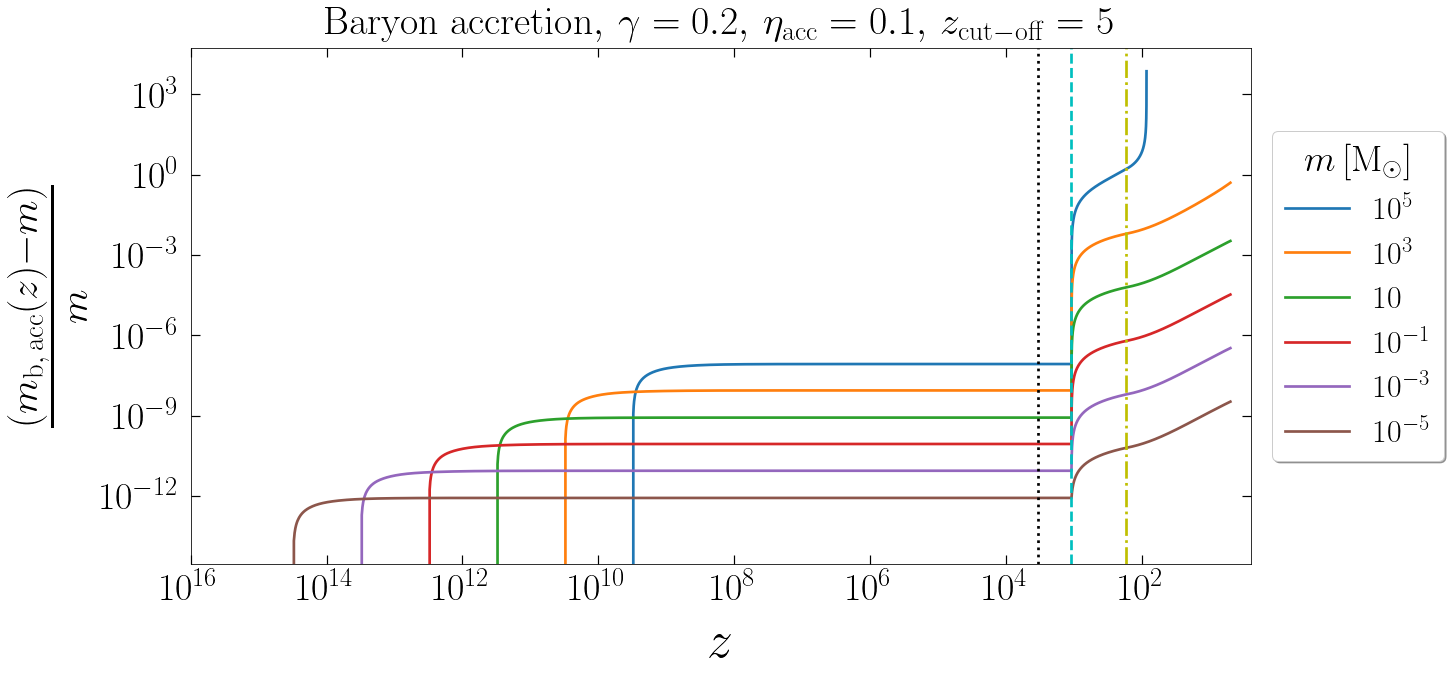

In [11]:
# Baryon accretion starting from z_i upto z_cut-off = 5.


m_arr = np.geomspace(1e5, 1e-5, 6)


colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 2.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


γ = 0.2
z_cut = 5
N = 1000

for i, (m, color) in enumerate(zip(m_arr, colors)):
    z_1i = z_pbh(m,  γ)
    y_1i = m
    z_cut_off1 = z_eq
    t1 = np.geomspace(z_1i, z_cut_off1, N)
    sol1 = solve_ivp(m_bacc, t_span = [t1[0], t1[-1]], y0 = [y_1i], method = 'DOP853', t_eval = t1)
    t1 = sol1.t
    y1 = sol1.y[0]
    
    
    z_2i = z_cut_off1
    y_2i = y1[-1]
    z_cut_off2 = z_rec
    t2 = np.geomspace(z_2i, z_cut_off2, N)
    sol2 = solve_ivp(m_bacc, t_span = [t2[0], t2[-1]], y0 = [y_2i], method = 'DOP853', t_eval = t2,  max_step = 100)
    t2 = sol2.t
    y2 = sol2.y[0]
    
    
    z_3i = z_cut_off2
    y_3i = y2[-1]
    z_cut_off3 = z_th
    t3 = np.geomspace(z_3i, z_cut_off3, N)
    sol3 = solve_ivp(m_bacc, t_span = [t3[0], t3[-1]], y0 = [y_3i], method = 'DOP853', t_eval = t3, max_step = 10)
    t3 = sol3.t
    y3 = sol3.y[0]
    
    
    
    z_4i = z_cut_off3
    y_4i = y3[-1]
    z_cut_off4 = 90
    t4 = np.geomspace(z_4i, z_cut_off4, N)
    sol4 = solve_ivp(m_bacc, t_span = [z_4i, z_cut_off4], y0 = [y_4i],  method = 'DOP853', t_eval = t4, first_step = 1, max_step = 10)
    t4 = sol4.t
    y4 = sol4.y[0]
    
    
    z_5i = z_cut_off4
    y_5i = y4[-1]
    z_cut_off5 = z_cut
    t5 = np.geomspace(z_5i, z_cut_off5, N)
    sol5 = solve_ivp(m_bacc, t_span = [t5[0], t5[-1]], y0 = [y_5i],  method = 'DOP853', t_eval = t5, first_step = 1,  max_step = 5)
    t5 = sol5.t
    y5 = sol5.y[0]
    
    
   
    
    
    T = np.concatenate((t1, t2, t3, t4, t5), axis=None)
    Y = np.concatenate((y1, y2, y3, y4, y5), axis=None)
    
    ax.loglog(T, ((Y - m)/m))

        
    
    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.axvline(x = z_rec,  color = 'c',  linestyle = '--')
plt.axvline(x = z_th,  color = 'y',  linestyle = '-.')
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)


plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$z$',fontsize = 52, labelpad = 14)
plt.ylabel(r'$\frac{(m_\mathrm{b, \, acc}(z) - m)}{m} $',fontsize = 58, labelpad = 14)
plt.legend(['$10^{5}$', r'$10^{3}$', '$10$', 
            '$10^{-1}$', '$10^{-3}$', r'$10^{-5}$'], 
           prop = {'size':32}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
plt.xlim(1e16, 0.5*z_cut)
plt.xscale('log')
plt.title(r'Baryon accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1, \, z_\mathrm{cut-off} = 5$', fontsize = 40, pad = 13)
plt.savefig('bacc_z_cutoff5.pdf', bbox_inches = 'tight')
plt.show()

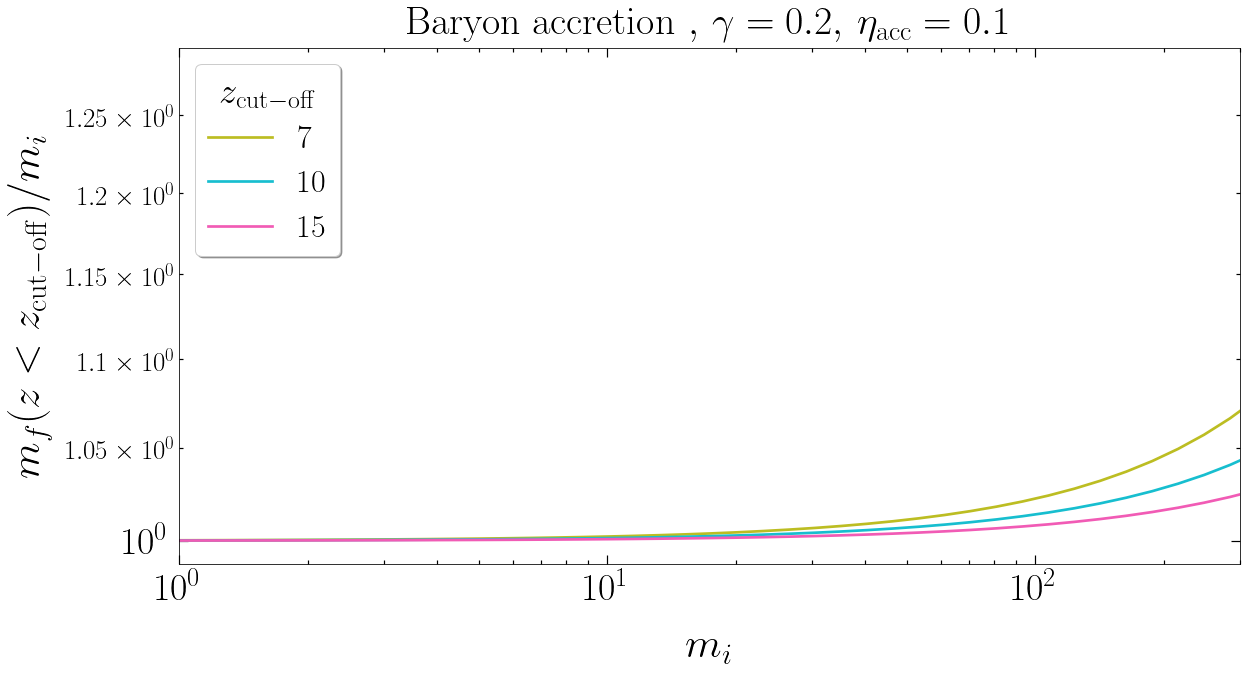

In [12]:
# Baryon accretion from redshift of PBH formation i.e. z_i to 
# different values of z_cut-off.
# Here, m_f(z < z_cut-off)/m_i implies  m_f(z = z_cut-off)/m_i.

m_spacing = 100
mi_arr = np.geomspace(1e3, 1e-3, m_spacing)





fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 2.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_cut_arr = np.array([7, 10, 15])
mf_arr = np.zeros(len(mi_arr))
colors = ['C8', 'C9',  '#f15bb5']
plot_lines = []
N = 10

for i, (z_cut, color) in enumerate(zip(z_cut_arr, colors)):
    for j, m in enumerate(mi_arr):
        γ = 0.2
        z_1i = z_pbh(m,  γ)
        y_1i = m
        z_cut_off1 = z_eq
        t1 = np.geomspace(z_1i, z_cut_off1, N)
        sol1 = solve_ivp(m_bacc, t_span = [t1[0], t1[-1]], y0 = [y_1i], method = 'DOP853',  t_eval = t1)
        t1 = sol1.t
        y1 = sol1.y[0]


        z_2i = z_eq
        y_2i = y1[-1]
        z_cut_off2 = z_rec
        t2 = np.geomspace(z_2i, z_cut_off2, N)
        sol2 = solve_ivp(m_bacc, t_span = [t2[0], t2[-1]], y0 = [y_2i], method = 'DOP853', t_eval = t2, max_step = 100)
        t2 = sol2.t
        y2 = sol2.y[0]



        z_3i = z_rec
        y_3i = y2[-1]
        z_cut_off3 = z_th
        t3 = np.geomspace(z_3i, z_cut_off3, N)
        sol3 = solve_ivp(m_bacc, t_span = [t3[0], t3[-1]], y0 = [y_3i], method = 'DOP853', t_eval = t3, max_step = 10)
        t3 = sol3.t
        y3 = sol3.y[0]

        
        z_4i = z_th
        y_4i = y3[-1]
        z_cut_off4 = 90
        t4 = np.geomspace(z_4i, z_cut_off4, N)
        sol4 = solve_ivp(m_bacc, t_span = [t4[0], t4[-1]], y0 = [y_4i], method = 'DOP853', t_eval = t4, first_step = 1, max_step = 10)
        t4 = sol4.t
        y4 = sol4.y[0]


        
        z_5i = z_cut_off4
        y_5i = y4[-1]
        z_cut_off5 = z_cut
        t5 = np.geomspace(z_5i, z_cut_off5, N)
        t_span = [t5[0], t5[-1]]
        sol5 = solve_ivp(m_bacc, t_span = [t5[0], t5[-1]], y0 = [y_5i], method = 'DOP853',  t_eval = t5, first_step = 1, max_step = 5)
        t5 = sol5.t
        y5 = sol5.y[0]
        
        
        mf_arr[j] = y5[-1]
        
    
    ax.loglog(mi_arr, np.divide(mf_arr, mi_arr), color = color)
        
        
       
    
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
ax.yaxis.set_tick_params(labelsize=20)
plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
ax.tick_params(axis = 'y', which = 'minor', labelsize = 27)
plt.xlabel('$m_{i}$',fontsize = 43, labelpad = 20)
plt.ylabel(r'$m_{f}(z < z_\mathrm{cut-off})/m_{i} $',fontsize = 43, labelpad = 14)
plt.legend(['$7$', '$10$', '$15$'], 
           prop = {'size':32}, loc = 'upper left', shadow = True, 
           title = '$z_\mathrm{cut-off}$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
plt.xlim(1, 300)
plt.xscale('log')
plt.title(r'Baryon accretion $,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1$', fontsize = 40, pad = 13)
plt.savefig('bacc_z_diff_cutoff.pdf', bbox_inches = 'tight')
plt.show()

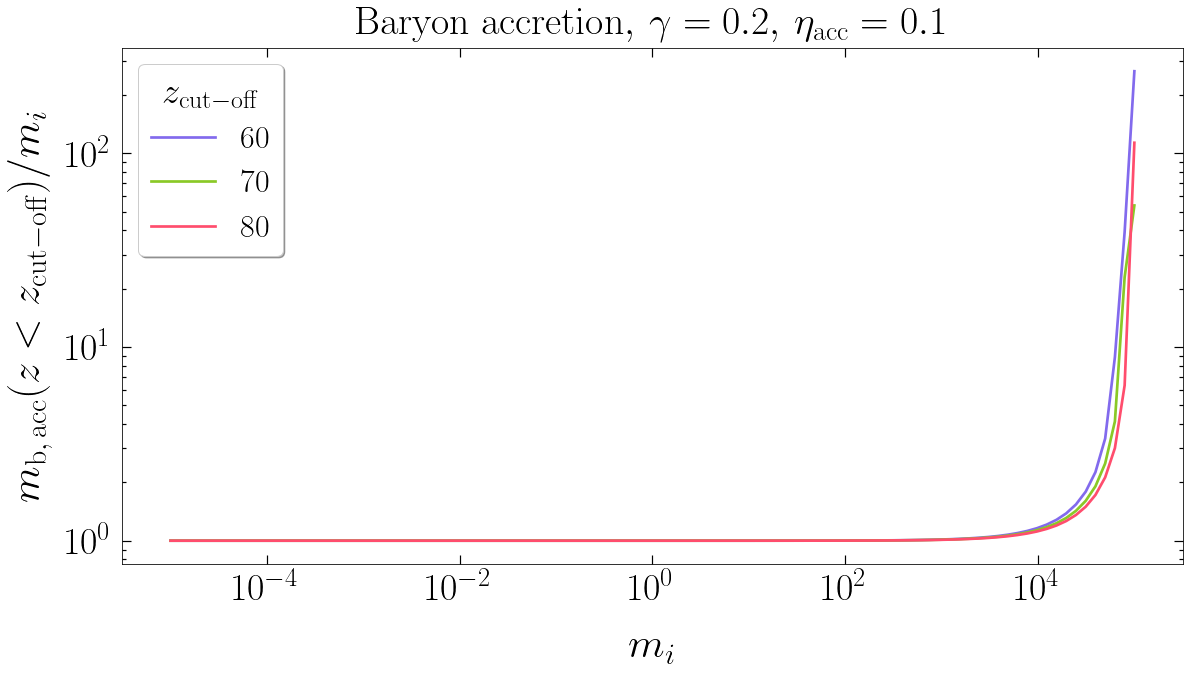

In [13]:
# Checking the validity of code for Baryon accretion 
# from redshift of PBH formation i.e. z_i to 
# different values of z_cut-off for m_i > 10³ M_solar.
# Here, m_f(z < z_cut-off)/m_i implies  m_f(z = z_cut-off)/m_i.


m_spacing = 100
mi_arr = np.geomspace(1e5, 1e-5, m_spacing)





fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 2.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_cut_arr = np.array([60, 70, 80])
mf_arr = np.zeros(len(mi_arr))
colors = ['#826aed', '#8ac926', '#ff4d6d']
plot_lines = []
N = 10

for i, (z_cut, color) in enumerate(zip(z_cut_arr, colors)):
    for j, m in enumerate(mi_arr):
        γ = 0.2
        z_1i = z_pbh(m,  γ)
        y_1i = m
        z_cut_off1 = z_eq
        t1 = np.geomspace(z_1i, z_cut_off1, N)
        sol1 = solve_ivp(m_bacc, t_span = [t1[0], t1[-1]], y0 = [y_1i], method = 'DOP853',  t_eval = t1)
        t1 = sol1.t
        y1 = sol1.y[0]


        z_2i = z_eq
        y_2i = y1[-1]
        z_cut_off2 = z_rec
        t2 = np.geomspace(z_2i, z_cut_off2, N)
        sol2 = solve_ivp(m_bacc, t_span = [t2[0], t2[-1]], y0 = [y_2i], method = 'DOP853', t_eval = t2, max_step = 100)
        t2 = sol2.t
        y2 = sol2.y[0]



        z_3i = z_rec
        y_3i = y2[-1]
        z_cut_off3 = z_th
        t3 = np.geomspace(z_3i, z_cut_off3, N)
        sol3 = solve_ivp(m_bacc, t_span = [t3[0], t3[-1]], y0 = [y_3i], method = 'DOP853', t_eval = t3, max_step = 10)
        t3 = sol3.t
        y3 = sol3.y[0]

        
        z_4i = z_th
        y_4i = y3[-1]
        z_cut_off4 = 90
        t4 = np.geomspace(z_4i, z_cut_off4, N)
        sol4 = solve_ivp(m_bacc, t_span = [t4[0], t4[-1]], y0 = [y_4i], method = 'DOP853', t_eval = t4, first_step = 1, max_step = 10)
        t4 = sol4.t
        y4 = sol4.y[0]


        
        z_5i = z_cut_off4
        y_5i = y4[-1]
        z_cut_off5 = z_cut
        t5 = np.geomspace(z_5i, z_cut_off5, N)
        t_span = [t5[0], t5[-1]]
        sol5 = solve_ivp(m_bacc, t_span = [t5[0], t5[-1]], y0 = [y_5i], method = 'DOP853',  t_eval = t5, first_step = 1, max_step = 5)
        t5 = sol5.t
        y5 = sol5.y[0]
        
        
        mf_arr[j] = y5[-1]
        
    ax.loglog(mi_arr, np.divide(mf_arr, mi_arr), color = color)
        
        
       
    
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
ax.yaxis.set_tick_params(labelsize=20)
plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$m_{i}$',fontsize = 43, labelpad = 20)
plt.ylabel(r'$m_\mathrm{b, \, acc}(z < z_\mathrm{cut-off})/m_{i} $',fontsize = 43, labelpad = 14)
plt.legend(['$60$', '$70$', '$80$' ], 
           prop = {'size':32}, loc = 'upper left', shadow = True, 
           title = '$z_\mathrm{cut-off}$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
plt.xscale('log')
plt.title(r'Baryon accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1$', fontsize = 40, pad = 13)
plt.savefig('bacc_z_diff_cutoff_check.pdf', bbox_inches = 'tight')
plt.show()

In [18]:
# So after all checks with found that our accretion code blows up for 
# initial PBH masses higher than 10³ M_solar and z_cut ⪆ 70.

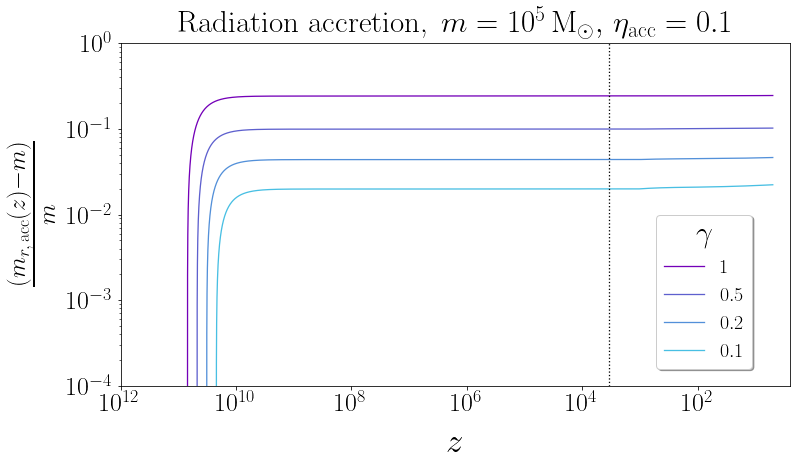

In [15]:
# Radiation accretion from RD to upto MRE for different values of γ.
# Here, γ is the ratio between the PBH mass and the horizon mass.
# Using t_i(m_i) = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((s**2)/2) and
# dm/dz = dm/dt . dt/dz with full dt/dz calculated from t_3 with
# t_3 = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)).
# Here, z_i is the redshift at which PBH formation takes place in RD.




fig, ax = plt.subplots(1, figsize = (12, 6.3))
colors = ['#7400b8', '#5e60ce', '#5390d9','#48bfe3']

γ = np.geomspace(1, 0.1, 4)
m_arr = np.geomspace(1e5, 1e-5, 6)
z_cut = 5
N = 10000


for i, (γ, color) in enumerate(zip(γ, colors)): 
    m = m_arr[1]
    z_i = z_pbh(m,  γ)
    z_1i = z_pbh(m,  γ)
    y_1i = m 
    z_cut_off1 = z_eq
    t1 = np.geomspace(z_1i, z_cut_off1, N)
    sol1 = solve_ivp(m_racc, t_span = [t1[0], t1[-1]], y0 = [y_1i], method = 'DOP853',  t_eval = t1)
    t1 = sol1.t
    y1 = sol1.y[0]
    
    
    z_2i = z_cut_off1
    y_2i = y1[-1]
    z_cut_off2 = z_rec
    t2 = np.geomspace(z_2i, z_cut_off2, N)
    sol2 = solve_ivp(m_racc, t_span = [t2[0], t2[-1]], y0 = [y_2i], method = 'DOP853',   t_eval = t2, max_step = 100)
    t2 = sol2.t
    y2 = sol2.y[0]
    
    
    
    z_3i = z_cut_off2
    y_3i = y2[-1]
    z_cut_off3 = z_th
    t3 = np.geomspace(z_3i, z_cut_off3, N)
    sol3 = solve_ivp(m_racc, t_span = [t3[0], t3[-1]], y0 = [y_3i], method = 'DOP853',  t_eval = t3, max_step = 10)
    t3 = sol3.t
    y3 = sol3.y[0]
    
    
    
    z_4i = z_cut_off3
    y_4i = y3[-1]
    z_cut_off4 = 90
    t4 = np.geomspace(z_4i, z_cut_off4, N)
    sol4 = solve_ivp(m_racc, t_span = [t4[0], t4[-1]], y0 = [y_4i], method = 'DOP853',  t_eval = t4, first_step = 1,  max_step = 10)
    t4 = sol4.t
    y4 = sol4.y[0]
    
    
    z_5i = z_cut_off4
    y_5i = y4[-1]
    z_cut_off5 = z_cut
    t5 = np.geomspace(z_5i, z_cut_off5, N)
    sol5 = solve_ivp(m_racc, t_span = [t5[0], t5[-1]], y0 = [y_5i], method = 'DOP853',  t_eval = t5, first_step = 1, max_step = 5)
    t5 = sol5.t
    y5 = sol5.y[0]
    
    
    
    T = np.concatenate((t1, t2, t3, t4, t5), axis = None)
    Y = np.concatenate((y1, y2, y3, y4, y5), axis = None)
    
    ax.loglog(T, ((Y - m)/m), color = color)

    

plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xlabel('$z$',fontsize = 35, labelpad = 12)
plt.ylabel(r'$\frac{(m_{r, \, \mathrm{acc}}(z) - m)}{m} $',fontsize = 35, labelpad = 12)
plt.legend(['$1$', r'$0.5$',
            '$0.2$',  '$0.1$'], 
           prop = {'size':20}, loc = (0.8, 0.05), shadow = True, 
           title = '$\gamma$' ,
           title_fontsize = 30, facecolor = 'white', fontsize = 75)

plt.xlim(1e12, 0.5*z_cut)
plt.ylim(1e-4, 1)
plt.title(r'Radiation accretion, $\,m = 10^{5}\,\mathrm{M_{\odot}}, \,  \eta_\mathrm{acc} = 0.1$', fontsize = 31, pad = 11)
plt.savefig('γ_racc.pdf', bbox_inches = 'tight')
plt.show()

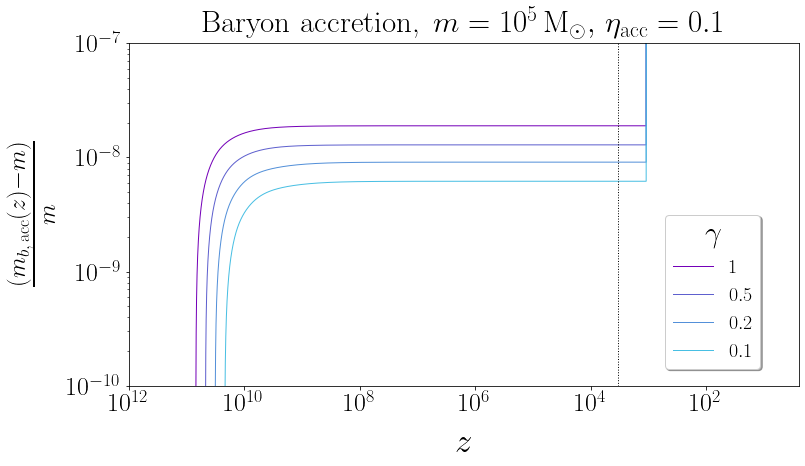

In [18]:
# Baryon accretion from RD to upto MRE for different values of γ.
# Here, γ is the ratio between the PBH mass and the horizon mass.
# Using t_i(m_i) = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((s**2)/2) and
# dm/dz = dm/dt . dt/dz with full dt/dz calculated from t_3 with
# t_3 = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)).
# Here, z_i is the redshift at which PBH formation takes place in RD.



fig, ax = plt.subplots(1, figsize = (12, 6.3))
colors = ['#7400b8', '#5e60ce', '#5390d9','#48bfe3']

γ = np.geomspace(1, 0.1, 4)
m_arr = np.geomspace(1e5, 1e-5, 6)


z_cut = 5
N = 10000


for i, (γ, color) in enumerate(zip(γ, colors)): 
    m = m_arr[1]
    z_i = z_pbh(m,  γ)
    z_1i = z_pbh(m,  γ)
    y_1i = m 
    z_cut_off1 = z_eq
    t1 = np.geomspace(z_1i, z_cut_off1, N)
    sol1 = solve_ivp(m_bacc, t_span = [t1[0], t1[-1]], y0 = [y_1i], method = 'DOP853',  t_eval = t1)
    t1 = sol1.t
    y1 = sol1.y[0]
    
    
    z_2i = z_cut_off1
    y_2i = y1[-1]
    z_cut_off2 = z_rec
    t2 = np.geomspace(z_2i, z_cut_off2, N)
    sol2 = solve_ivp(m_bacc, t_span = [t2[0], t2[-1]], y0 = [y_2i], method = 'DOP853',   t_eval = t2, max_step = 100)
    t2 = sol2.t
    y2 = sol2.y[0]
    
    
    
    z_3i = z_cut_off2
    y_3i = y2[-1]
    z_cut_off3 = z_th
    t3 = np.geomspace(z_3i, z_cut_off3, N)
    sol3 = solve_ivp(m_bacc, t_span = [t3[0], t3[-1]], y0 = [y_3i], method = 'DOP853',  t_eval = t3, max_step = 10)
    t3 = sol3.t
    y3 = sol3.y[0]
    
    
    
    z_4i = z_cut_off3
    y_4i = y3[-1]
    z_cut_off4 = 90
    t4 = np.geomspace(z_4i, z_cut_off4, N)
    sol4 = solve_ivp(m_bacc, t_span = [t4[0], t4[-1]], y0 = [y_4i], method = 'DOP853',  t_eval = t4, first_step = 1,  max_step = 10)
    t4 = sol4.t
    y4 = sol4.y[0]
    
    
    z_5i = z_cut_off4
    y_5i = y4[-1]
    z_cut_off5 = z_cut
    t5 = np.geomspace(z_5i, z_cut_off5, N)
    sol5 = solve_ivp(m_bacc, t_span = [t5[0], t5[-1]], y0 = [y_5i], method = 'DOP853',  t_eval = t5, first_step = 1, max_step = 5)
    t5 = sol5.t
    y5 = sol5.y[0]
    
    
    
    T = np.concatenate((t1, t2, t3, t4, t5), axis = None)
    Y = np.concatenate((y1, y2, y3, y4, y5), axis = None)
    
    ax.loglog(T, ((Y - m)/m), color = color)

    

plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xlabel('$z$',fontsize = 35, labelpad = 12)
plt.ylabel(r'$\frac{(m_{b, \, \mathrm{acc}}(z) - m)}{m} $',fontsize = 35, labelpad = 12)
plt.legend(['$1$', r'$0.5$',
            '$0.2$',  '$0.1$'], 
           prop = {'size':20}, loc = (0.8, 0.05), shadow = True, 
           title = '$\gamma$' ,
           title_fontsize = 30, facecolor = 'white', fontsize = 75)

plt.xlim(1e12, 0.5*z_cut)
plt.ylim(1e-10, 1e-7)
plt.title(r'Baryon accretion, $\,m = 10^{5}\,\mathrm{M_{\odot}}, \,  \eta_\mathrm{acc} = 0.1$', fontsize = 31, pad = 11)
plt.savefig('γ_bacc.pdf', bbox_inches = 'tight')
plt.show()

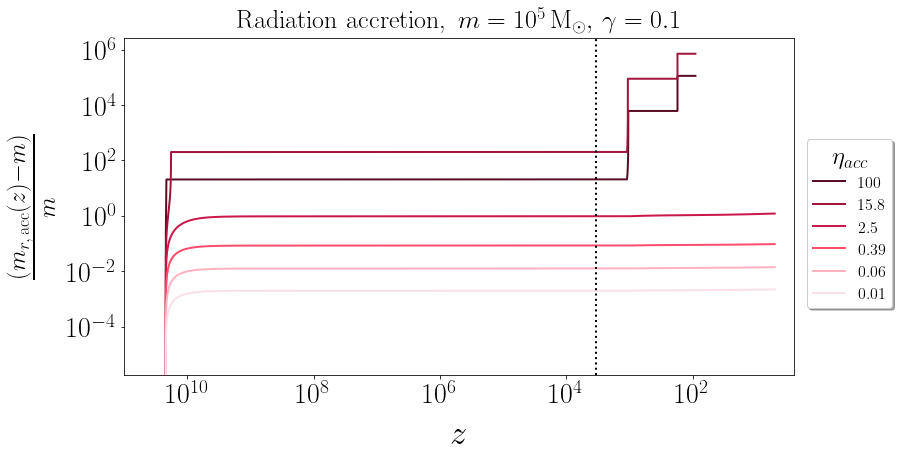

In [35]:
# Accretion of radiation for different values of η_acc.
# Here, ρ = ρ_r0 (1 + z)⁴ up to z_eq.
# v << c_s(z).




fig, ax = plt.subplots(1, figsize = (12, 6.2))
colors = ['#590d22', '#a4133c', '#c9184a', '#ff4d6d', '#ffb3c1',  '#FCDFEB']

η_acc = np.geomspace(100, 0.01, 6)
m_arr = np.geomspace(1e5, 1e-5, 6)
N = 10000

for i, (η_acc, color) in enumerate(zip(η_acc, colors)):
    m = m_arr[1]
    z_i = z_pbh(m,  γ)
    z_1i = z_pbh(m,  γ)
    y_1i = m 
    z_cut_off1 = z_eq
    t1 = np.geomspace(z_1i, z_cut_off1, N)
    sol1 = solve_ivp(m_racc, t_span = [t1[0], t1[-1]], y0 = [y_1i], method = 'DOP853',  t_eval = t1)
    t1 = sol1.t
    y1 = sol1.y[0]
    
    
    z_2i = z_cut_off1
    y_2i = y1[-1]
    z_cut_off2 = z_rec
    t2 = np.geomspace(z_2i, z_cut_off2, N)
    sol2 = solve_ivp(m_racc, t_span = [t2[0], t2[-1]], y0 = [y_2i], method = 'DOP853',   t_eval = t2, max_step = 100)
    t2 = sol2.t
    y2 = sol2.y[0]
    
    
    
    z_3i = z_cut_off2
    y_3i = y2[-1]
    z_cut_off3 = z_th
    t3 = np.geomspace(z_3i, z_cut_off3, N)
    sol3 = solve_ivp(m_racc, t_span = [t3[0], t3[-1]], y0 = [y_3i], method = 'DOP853',  t_eval = t3, max_step = 10)
    t3 = sol3.t
    y3 = sol3.y[0]
    
    
    
    z_4i = z_cut_off3
    y_4i = y3[-1]
    z_cut_off4 = 90
    t4 = np.geomspace(z_4i, z_cut_off4, N)
    sol4 = solve_ivp(m_racc, t_span = [t4[0], t4[-1]], y0 = [y_4i], method = 'DOP853',  t_eval = t4, first_step = 1,  max_step = 10)
    t4 = sol4.t
    y4 = sol4.y[0]
    
    
    z_5i = z_cut_off4
    y_5i = y4[-1]
    z_cut_off5 = z_cut
    t5 = np.geomspace(z_5i, z_cut_off5, N)
    sol5 = solve_ivp(m_racc, t_span = [t5[0], t5[-1]], y0 = [y_5i], method = 'DOP853',  t_eval = t5, first_step = 1, max_step = 5)
    t5 = sol5.t
    y5 = sol5.y[0]
    
    
    
    T = np.concatenate((t1, t2, t3, t4, t5), axis = None)
    Y = np.concatenate((y1, y2, y3, y4, y5), axis = None)
    
    ax.loglog(T, ((Y - m)/m), color = color)

    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
    
plt.rc('lines', linewidth = 2)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.xlabel('$z$',fontsize = 34.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_{r, \, \mathrm{acc}}(z) - m)}{m} $',fontsize = 35, labelpad = 12)
plt.legend(['$100$', '$15.8$',
            '$2.5$', '$0.39$', '$0.06$', '$0.01$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$\eta_{acc}$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.xlim(1e11, 0.5*z_cut)
plt.xscale('log')
plt.title(r'Radiation accretion, $\,m = 10^{5}\,\mathrm{M_{\odot}}, \, \gamma = 0.1$', fontsize = 26, pad = 11)
plt.savefig('η_racc.pdf', bbox_inches = 'tight')
plt.show()

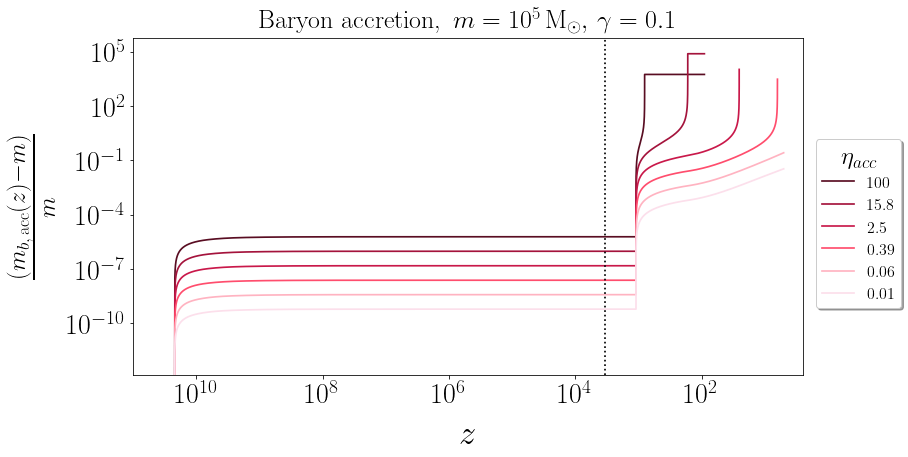

In [38]:
# Accretion of baryons for different values of η_acc.
# Here, ρ = ρ_r0 (1 + z)⁴ up to z_eq.
# v << c_s(z).




fig, ax = plt.subplots(1, figsize = (12, 6.2))
colors = ['#590d22', '#a4133c', '#c9184a', '#ff4d6d', '#ffb3c1',  '#FCDFEB']

η_acc = np.geomspace(100, 0.01, 6)
m_arr = np.geomspace(1e5, 1e-5, 6)
N = 10000

for i, (η_acc, color) in enumerate(zip(η_acc, colors)):
    m = m_arr[1]
    z_i = z_pbh(m,  γ)
    z_1i = z_pbh(m,  γ)
    y_1i = m 
    z_cut_off1 = z_eq
    t1 = np.geomspace(z_1i, z_cut_off1, N)
    sol1 = solve_ivp(m_bacc, t_span = [t1[0], t1[-1]], y0 = [y_1i], method = 'DOP853',  t_eval = t1)
    t1 = sol1.t
    y1 = sol1.y[0]
    
    
    z_2i = z_cut_off1
    y_2i = y1[-1]
    z_cut_off2 = z_rec
    t2 = np.geomspace(z_2i, z_cut_off2, N)
    sol2 = solve_ivp(m_bacc, t_span = [t2[0], t2[-1]], y0 = [y_2i], method = 'DOP853',   t_eval = t2, max_step = 100)
    t2 = sol2.t
    y2 = sol2.y[0]
    
    
    
    z_3i = z_cut_off2
    y_3i = y2[-1]
    z_cut_off3 = z_th
    t3 = np.geomspace(z_3i, z_cut_off3, N)
    sol3 = solve_ivp(m_bacc, t_span = [t3[0], t3[-1]], y0 = [y_3i], method = 'DOP853',  t_eval = t3, max_step = 10)
    t3 = sol3.t
    y3 = sol3.y[0]
    
    
    
    z_4i = z_cut_off3
    y_4i = y3[-1]
    z_cut_off4 = 90
    t4 = np.geomspace(z_4i, z_cut_off4, N)
    sol4 = solve_ivp(m_bacc, t_span = [t4[0], t4[-1]], y0 = [y_4i], method = 'DOP853',  t_eval = t4, first_step = 1,  max_step = 10)
    t4 = sol4.t
    y4 = sol4.y[0]
    
    
    z_5i = z_cut_off4
    y_5i = y4[-1]
    z_cut_off5 = z_cut
    t5 = np.geomspace(z_5i, z_cut_off5, N)
    sol5 = solve_ivp(m_bacc, t_span = [t5[0], t5[-1]], y0 = [y_5i], method = 'DOP853',  t_eval = t5, first_step = 1, max_step = 5)
    t5 = sol5.t
    y5 = sol5.y[0]
    
    
    
    T = np.concatenate((t1, t2, t3, t4, t5), axis = None)
    Y = np.concatenate((y1, y2, y3, y4, y5), axis = None)
    
    ax.loglog(T, ((Y - m)/m), color = color)

    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
    
plt.rc('lines', linewidth = 2)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.xlabel('$z$',fontsize = 34.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_{b, \, \mathrm{acc}}(z) - m)}{m} $',fontsize = 35, labelpad = 12)
plt.legend(['$100$', '$15.8$',
            '$2.5$', '$0.39$', '$0.06$', '$0.01$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$\eta_{acc}$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.xlim(1e11, 0.5*z_cut)
plt.xscale('log')
plt.title(r'Baryon accretion, $\,m = 10^{5}\,\mathrm{M_{\odot}}, \, \gamma = 0.1$', fontsize = 26, pad = 11)
plt.savefig('η_bacc.pdf', bbox_inches = 'tight')
plt.show()